In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()
sns.set_theme(style="whitegrid", palette=["#008080", "#FF7F50"])


df = pd.read_csv('customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing the blanks with 0 as tenure is 0 and no total charges were recorded.

In [3]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df['customerID'].duplicated().sum()

np.int64(0)

In [8]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [9]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Converted 0 and 1 values of SeniorCitizen to yes/no to make it easier to understand

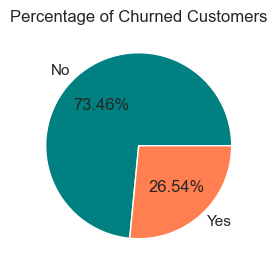

In [20]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

From the given pie chart we can conclude that 26.54% of the customers have churned out.
Let's figure out why? 

Let's see if difference in gender influences the churning of customers.

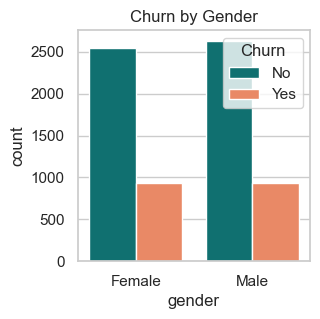

In [21]:
plt.figure(figsize=(3,3))
sns.countplot(x='gender', data=df, hue='Churn')
plt.title("Churn by Gender")
plt.show()


We can see that churning of customers is not heavily influnced by the gender of the customer.

Now lets check if senior citizens churn out more than other customers.

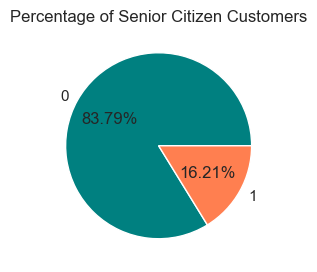

In [22]:
plt.figure(figsize = (3,4))
gb = df.groupby("SeniorCitizen").agg({'SeniorCitizen':'count'})
plt.pie(gb['SeniorCitizen'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Senior Citizen Customers")
plt.show()

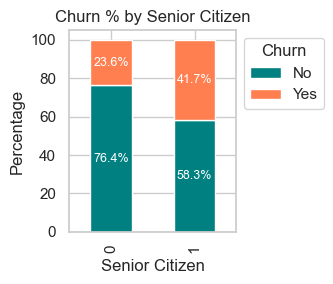

In [23]:
# Get counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Convert to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot stacked bar
percentages.plot(kind='bar', stacked=True, figsize=(3.5,3))

# Add labels
for i, (index, row) in enumerate(percentages.iterrows()):
    bottom = 0
    for churn_status in percentages.columns:
        plt.text(i, bottom + (row[churn_status]/2), 
                 f"{row[churn_status]:.1f}%", 
                 ha='center', va='center', color='white', fontsize=9)
        bottom += row[churn_status]

plt.title('Churn % by Senior Citizen')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

Although percentage of Senior citizen customers is low,Senior Citizens show a significantly higher churn rate compared to younger customers, highlighting a potential age-related factor influencing customer retention.

Let’s now explore whether tenure has any influence on customer churn rates.

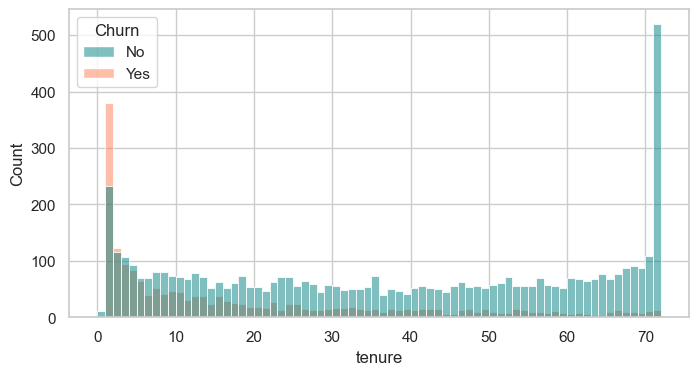

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(x='tenure', data=df, bins=72, hue='Churn')
plt.show()

Customers with shorter tenures show a much higher churn rate, while those with longer tenures tend to stay loyal to the service.

Let’s see if customers with longer-term contracts are less likely to churn compared to those on month-to-month plans.

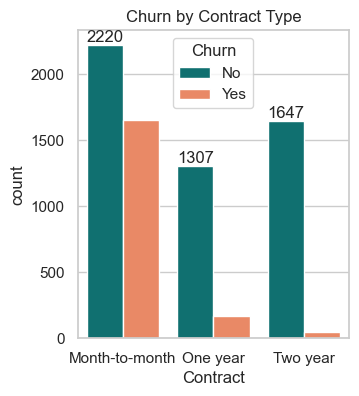

In [25]:
plt.figure(figsize=(3.5,4))
ax = sns.countplot(x= 'Contract', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn by Contract Type')
plt.show()

The chart shows that short-term (month-to-month) customers are far more likely to churn, whereas those with yearly contracts tend to stay longer.

Next, let’s examine how the type of internet service impacts customer churn.

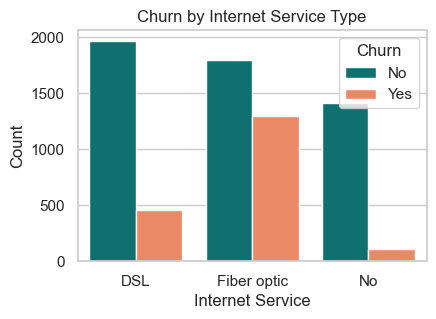

In [26]:
plt.figure(figsize=(4.5,3))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()


Customers using Fiber optic internet exhibit a much higher churn rate compared to those using DSL or having no internet service. This suggests that fiber optic users may be more price-sensitive or face service-related dissatisfaction.

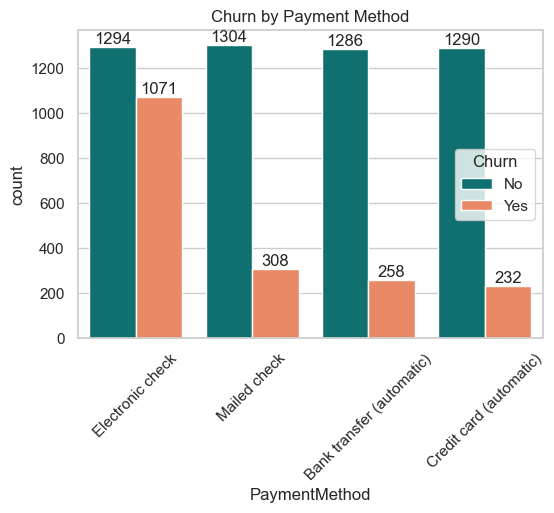

In [27]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x= 'PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn by Payment Method')
plt.xticks(rotation = 45)
plt.show()

The chart indicates that customers using automatic payment methods (like credit card or bank transfer) are more likely to stay, whereas electronic check users churn the most.

Overall, the analysis highlights that customer churn is strongly influenced by contract type, internet service, and payment method, with short-term and electronic-check users being the most likely to leave.